In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
%matplotlib inline
sns.set(rc={'figure.figsize': [10, 10]}, font_scale=1.2)

import warnings
warnings.filterwarnings('ignore')

# Read Dataset

In [2]:
df = pd.read_csv('/kaggle/input/pima-indians-diabetes-database/diabetes.csv')

In [3]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


# ِData Analysis

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


<AxesSubplot:>

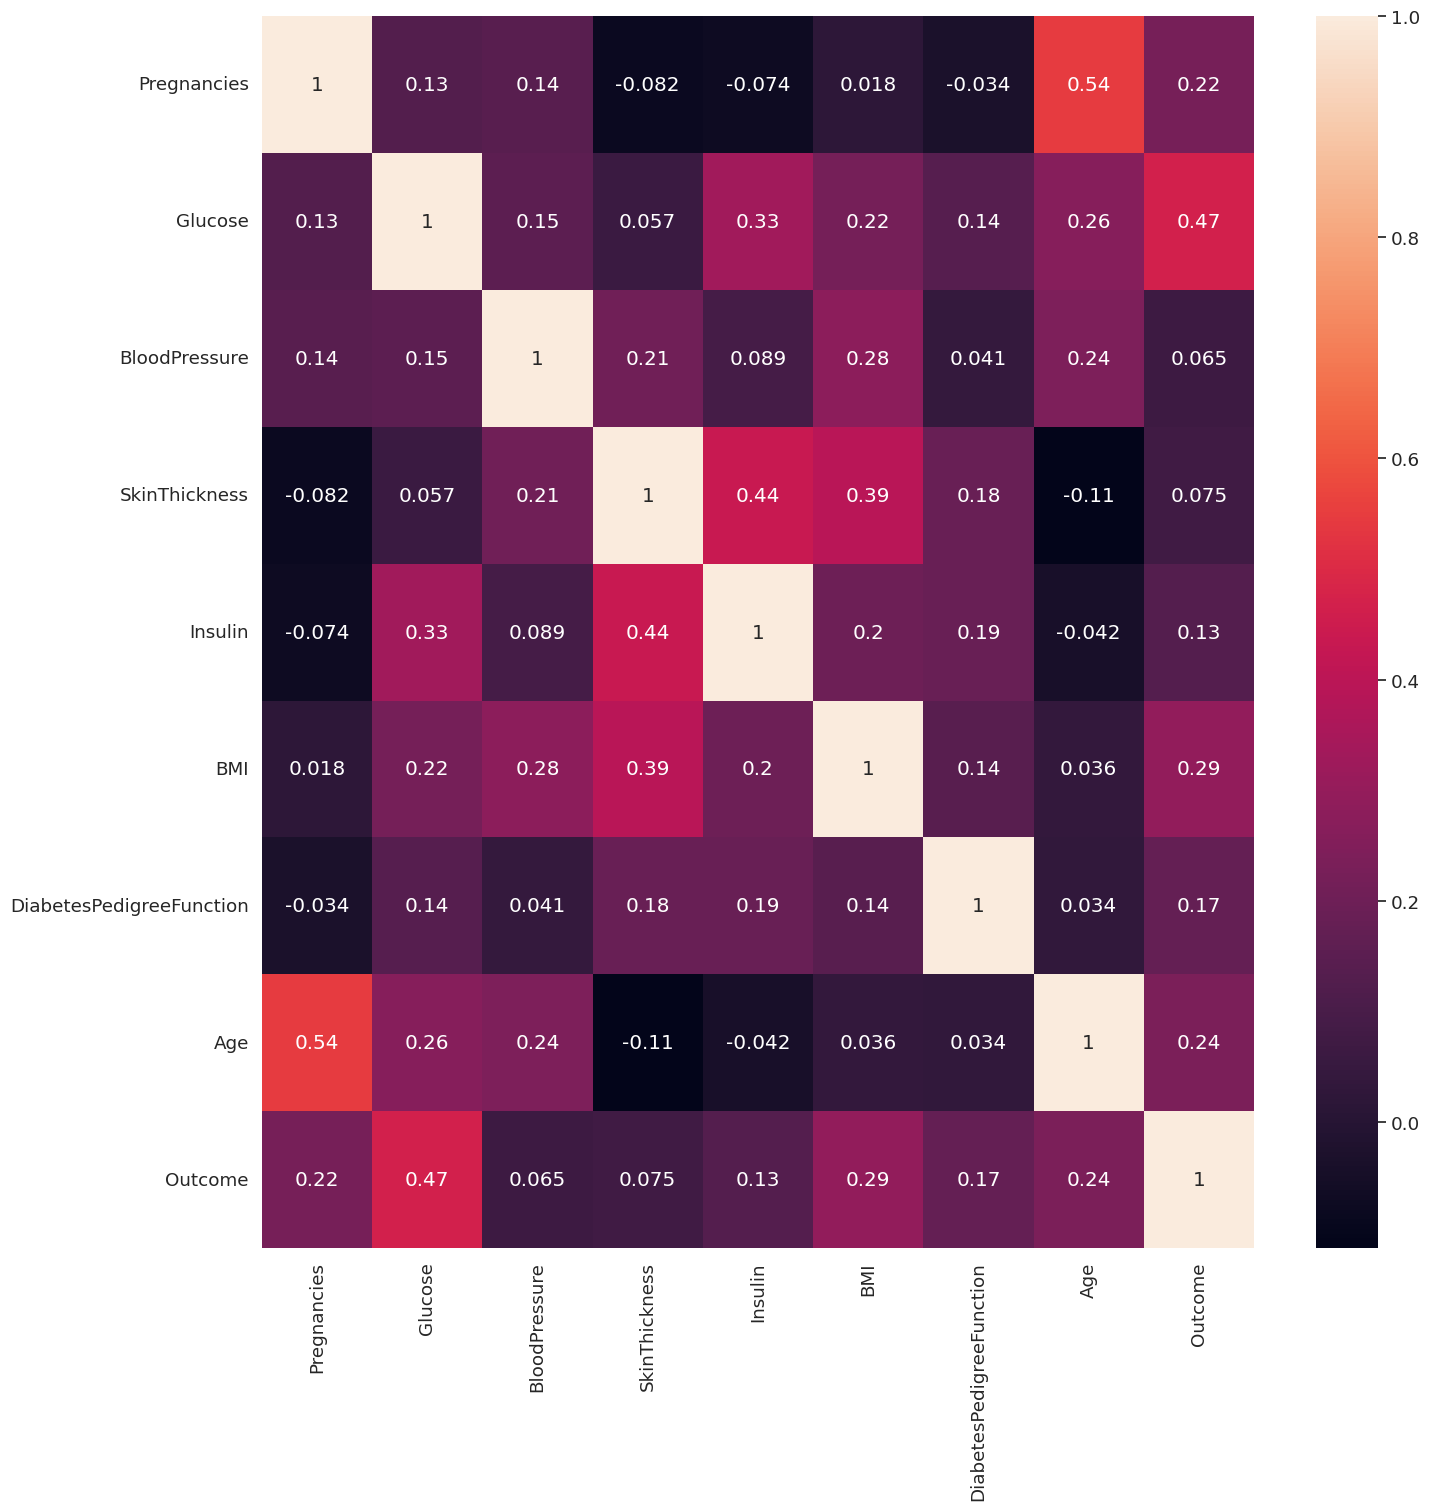

In [7]:
plt.figure(figsize=(16,16))
sns.heatmap(df.corr(), annot=True)

<AxesSubplot:xlabel='Outcome', ylabel='count'>

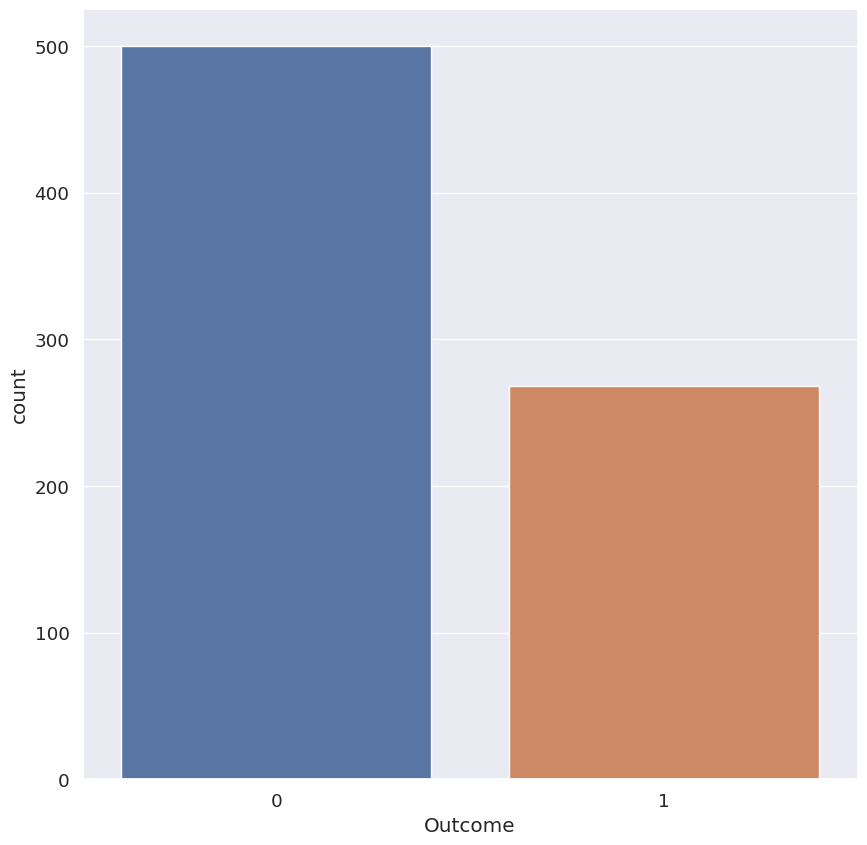

In [8]:
sns.countplot(x = 'Outcome',data = df)

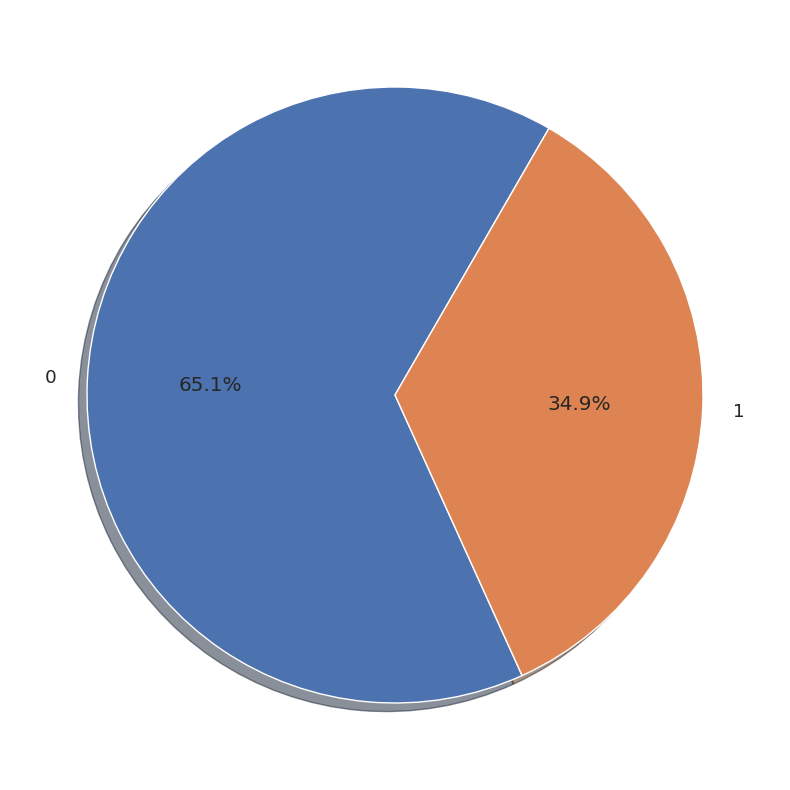

In [9]:
labels = ["0",'1']
values=df['Outcome'].value_counts().values
fig1, a1 = plt.subplots()
a1.pie(values, labels=labels, autopct='%1.1f%%',shadow=True,startangle=60)
plt.show()

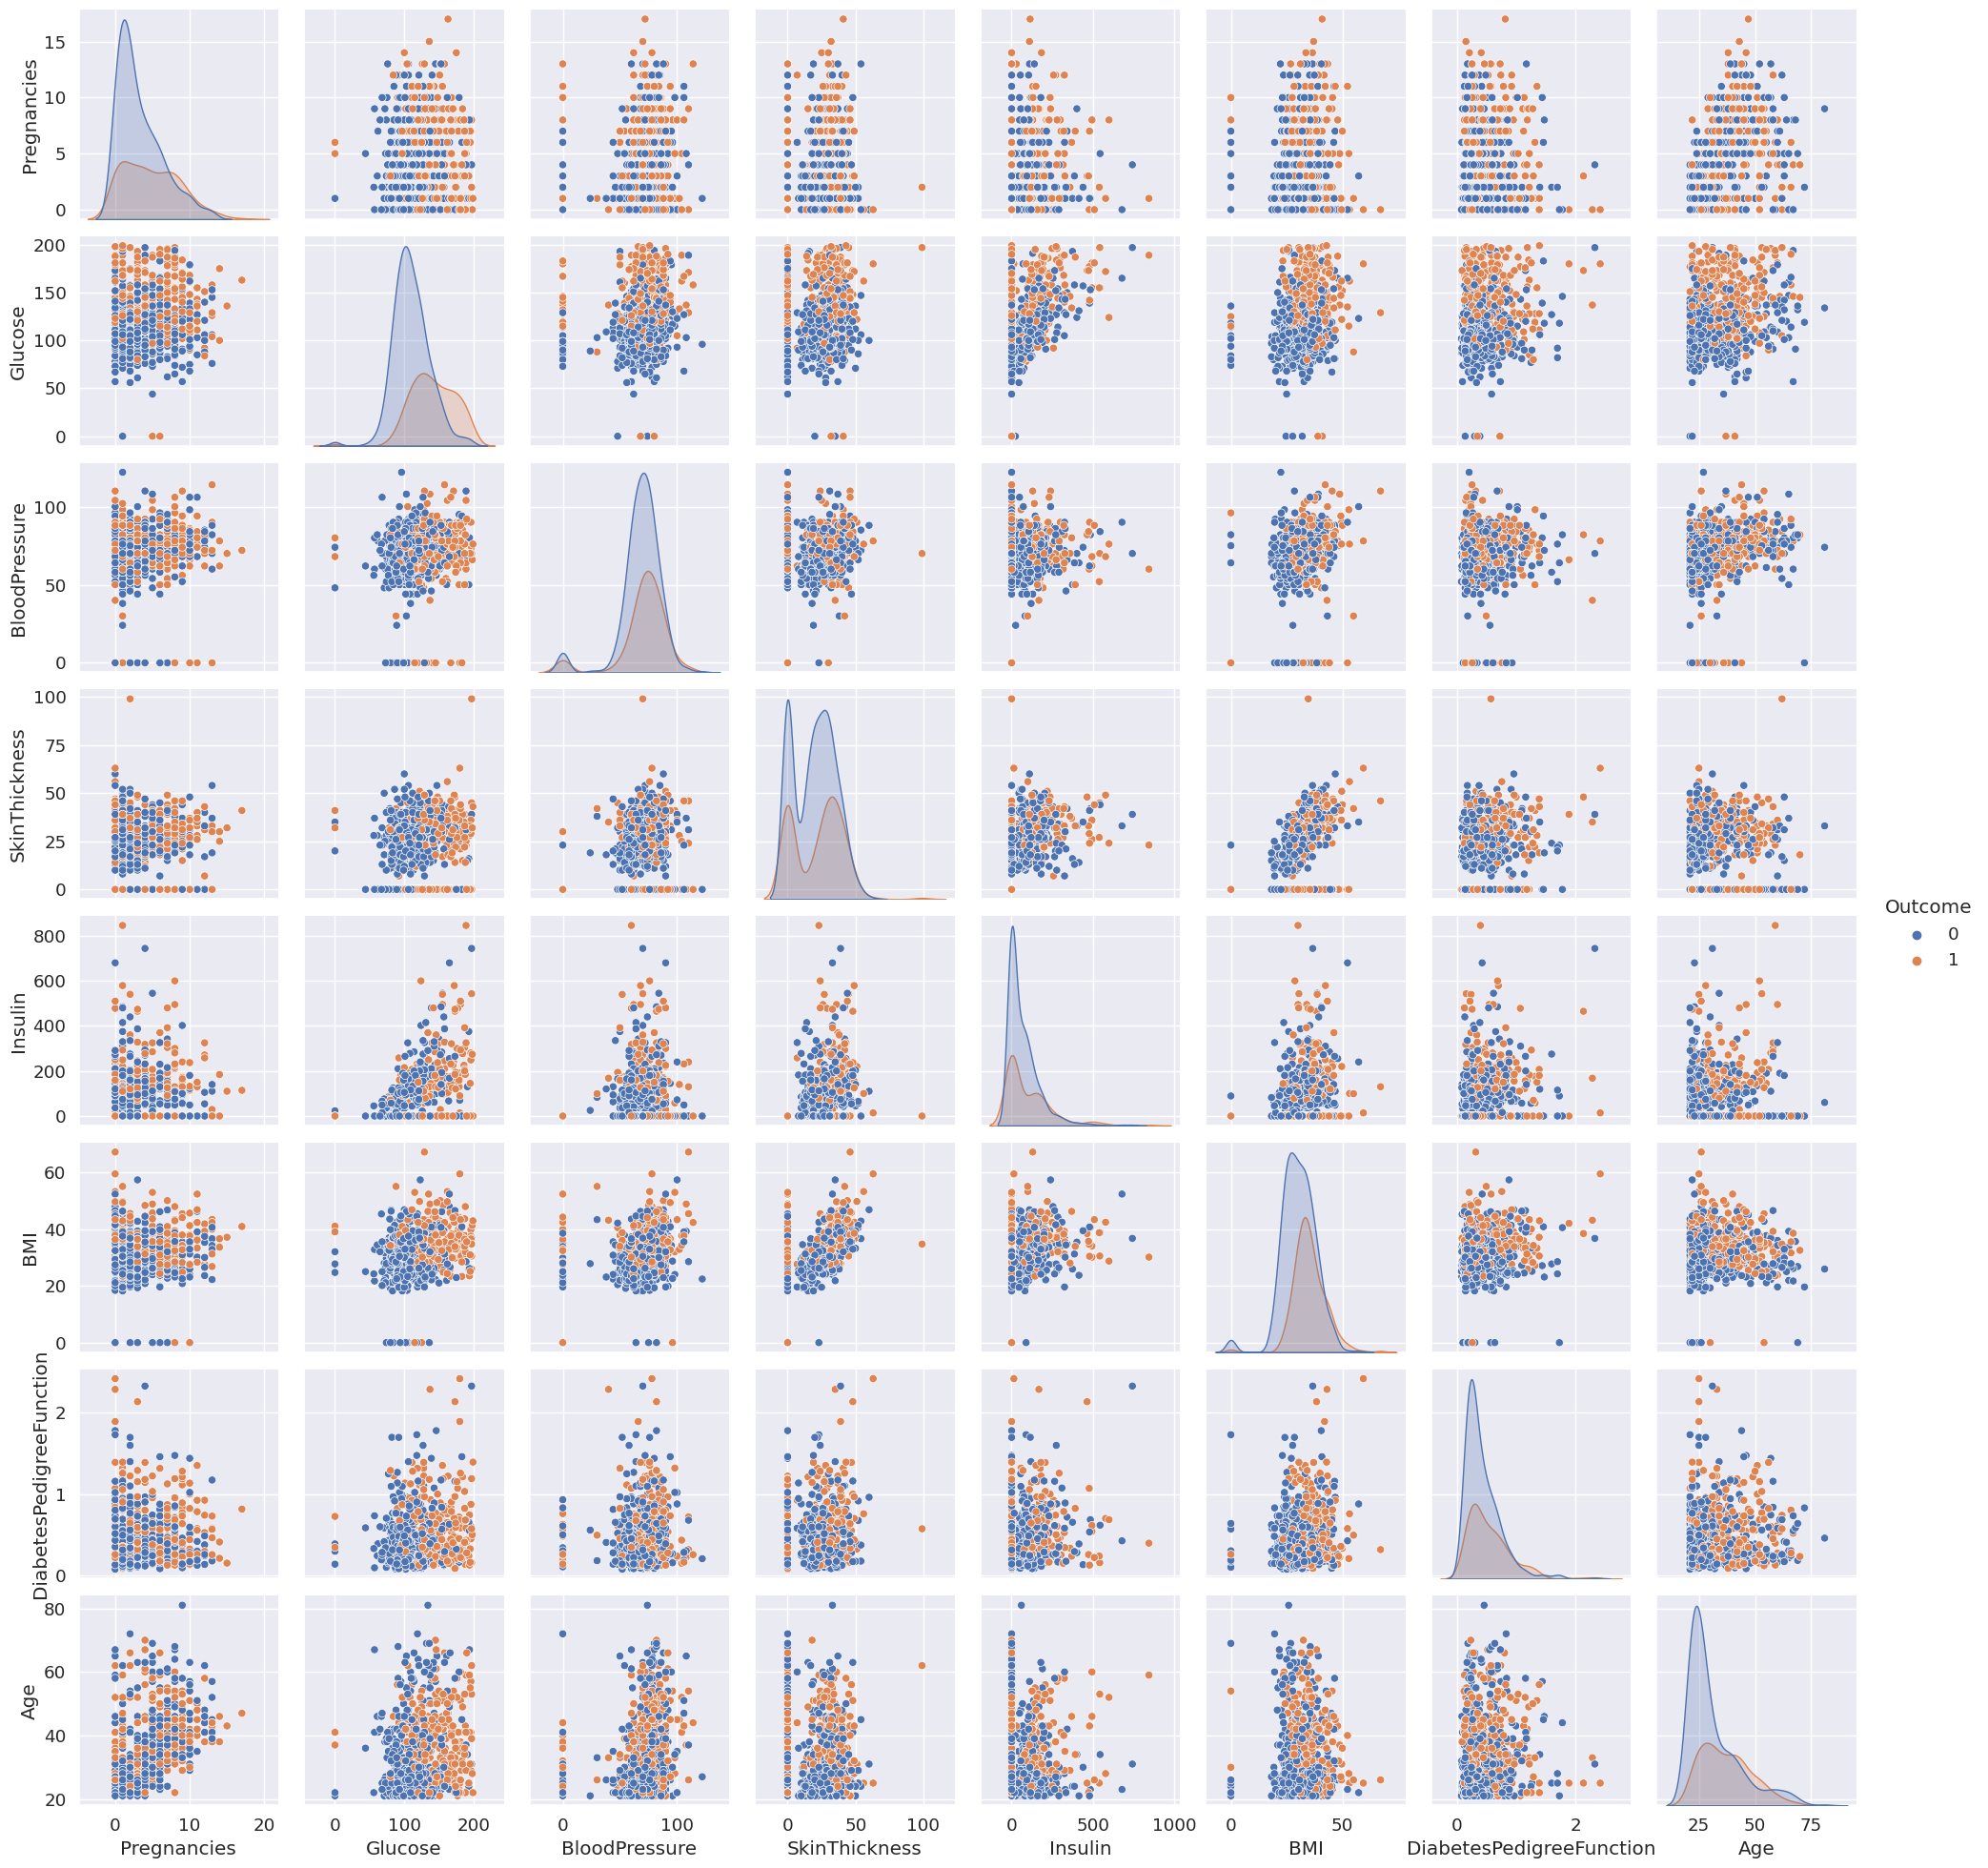

In [10]:
sns.pairplot(df,hue='Outcome')

In [11]:
print("Pregnancies: {0}".format(len(df.loc[df['Pregnancies'] == 0])))
print("Glucose: {0}".format(len(df.loc[df['Glucose'] == 0])))
print("bp: {0}".format(len(df.loc[df['BloodPressure'] == 0])))
print("SkinThickness: {0}".format(len(df.loc[df['SkinThickness'] == 0])))
print("Insulin: {0}".format(len(df.loc[df['Insulin'] == 0])))
print("BMI: {0}".format(len(df.loc[df['BMI'] == 0])))
print("DiabetesPedigreeFunction: {0}".format(len(df.loc[df['DiabetesPedigreeFunction'] == 0])))
print("Age: {0}".format(len(df.loc[df['Age'] == 0])))

Pregnancies: 111
Glucose: 5
bp: 35
SkinThickness: 227
Insulin: 374
BMI: 11
DiabetesPedigreeFunction: 0
Age: 0


# Model Preparation

### Split data into depentent  and indepentent 

In [12]:
X= df.drop(['Outcome'],axis=1) 
y = df['Outcome']  

## Data Cleaning

In [13]:
#Filling in the 0 values present with the mean of that particular property
from sklearn.impute import SimpleImputer
fill_values = SimpleImputer(missing_values = 0, strategy="mean")
Col_Name = ['Glucose' , 'BloodPressure' , 'SkinThickness' ,'Insulin' , 'BMI']
new = pd.DataFrame(fill_values.fit_transform(X.iloc[:,1:6]) , columns = Col_Name) 

In [14]:
d = pd.concat((X['Pregnancies'] , new), axis = 1)
a = pd.concat ([d ,X['DiabetesPedigreeFunction']] , axis = 1)
X = pd.concat ([a , X['Age']], axis = 1)
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72.0,35.00000,155.548223,33.6,0.627,50
1,1,85.0,66.0,29.00000,155.548223,26.6,0.351,31
2,8,183.0,64.0,29.15342,155.548223,23.3,0.672,32
3,1,89.0,66.0,23.00000,94.000000,28.1,0.167,21
4,0,137.0,40.0,35.00000,168.000000,43.1,2.288,33


## Feature Scaling

<AxesSubplot:xlabel='Pregnancies', ylabel='Density'>

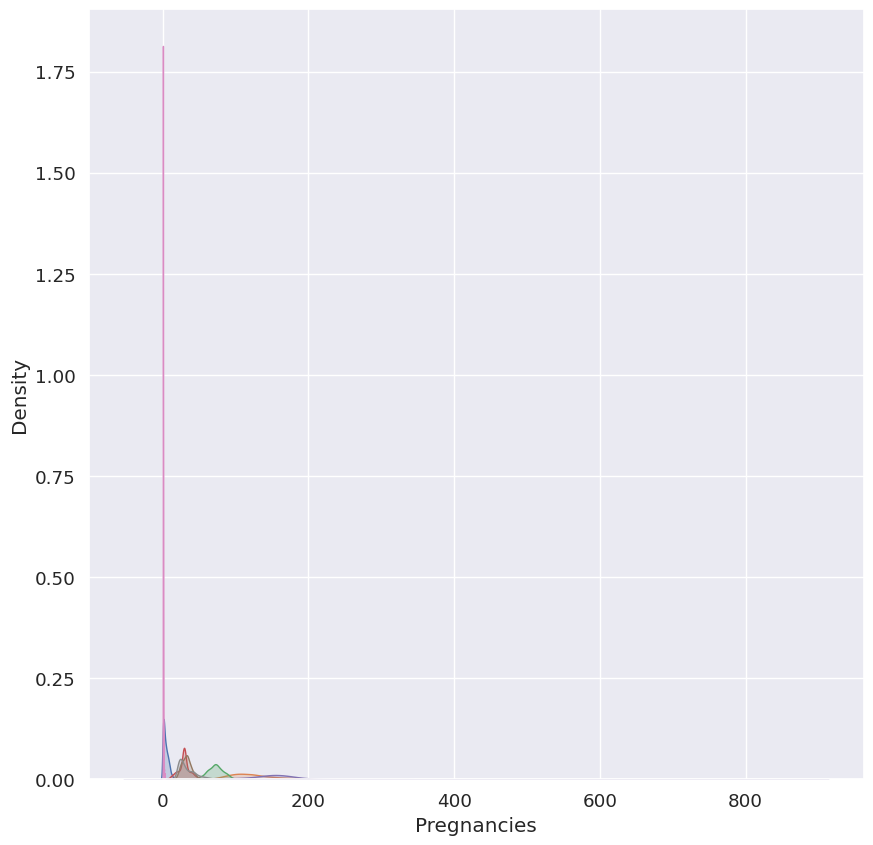

In [15]:
sns.kdeplot(X['Pregnancies'], shade=True)
sns.kdeplot(X['Glucose'], shade=True)
sns.kdeplot(X['BloodPressure'], shade=True)
sns.kdeplot(X['SkinThickness'], shade=True)
sns.kdeplot(X['Insulin'], shade=True)
sns.kdeplot(X['BMI'], shade=True)
sns.kdeplot(X['DiabetesPedigreeFunction'], shade=True)
sns.kdeplot(X['Age'], shade=True)

In [16]:
from sklearn.preprocessing import StandardScaler
stand= StandardScaler()
X = pd.DataFrame(stand.fit_transform(X),columns= X.columns)

<AxesSubplot:xlabel='Pregnancies', ylabel='Density'>

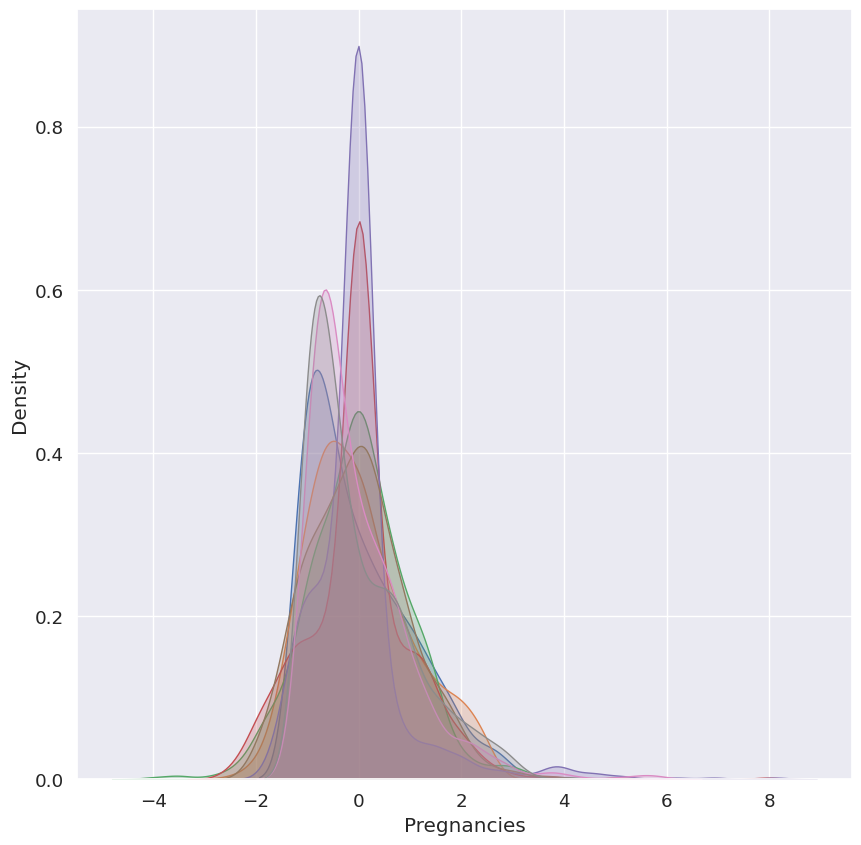

In [17]:
sns.kdeplot(X['Pregnancies'], shade=True)
sns.kdeplot(X['Glucose'], shade=True)
sns.kdeplot(X['BloodPressure'], shade=True)
sns.kdeplot(X['SkinThickness'], shade=True)
sns.kdeplot(X['Insulin'], shade=True)
sns.kdeplot(X['BMI'], shade=True)
sns.kdeplot(X['DiabetesPedigreeFunction'], shade=True)
sns.kdeplot(X['Age'], shade=True)

# Solve UnBalancing

## 1.UnderSample

In [18]:
from imblearn.over_sampling import RandomOverSampler
ns = RandomOverSampler()
X_us, y_us = ns.fit_resample(X,y)
data = pd.concat([X_us , y_us] , axis =1)

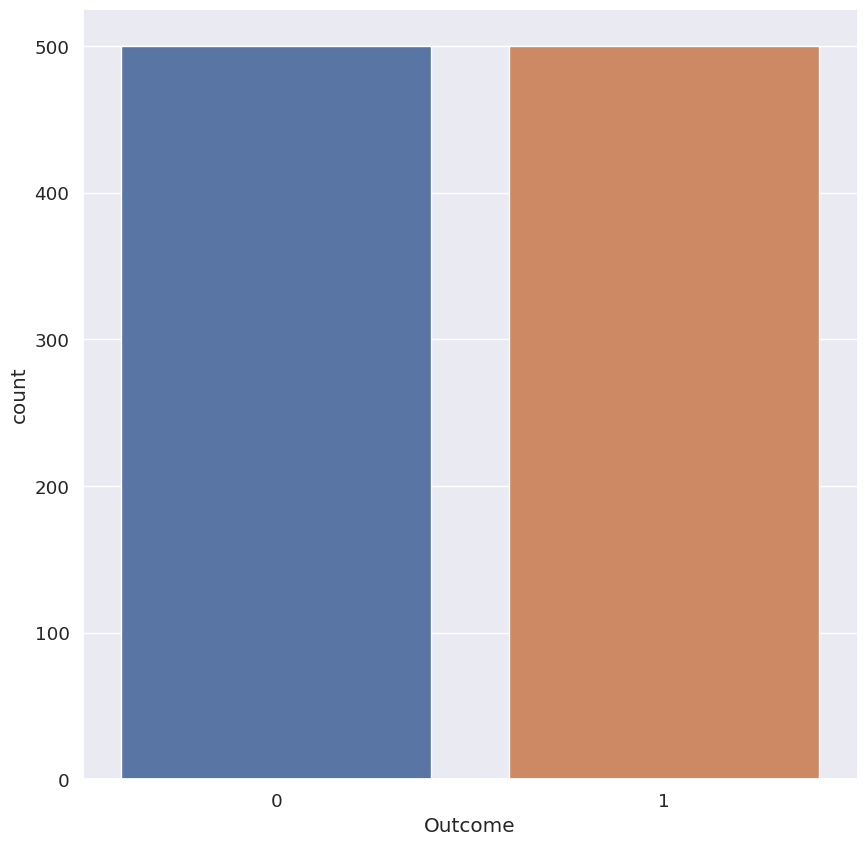

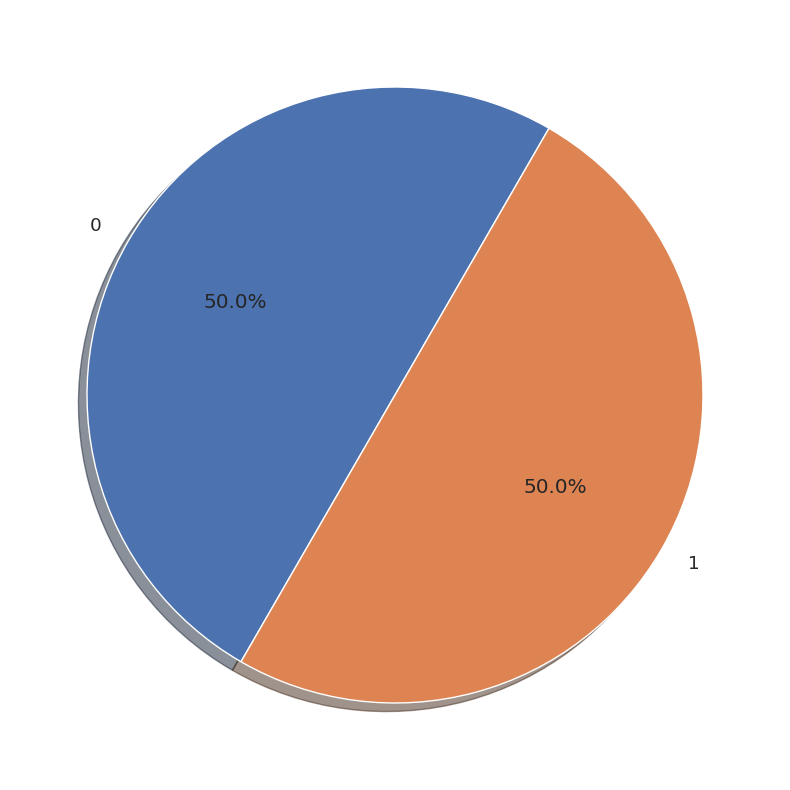

In [19]:
sns.countplot(x = 'Outcome',data = data)
labels = ["0",'1']
values=data['Outcome'].value_counts().values
fig1, a1 = plt.subplots()
a1.pie(values, labels=labels, autopct='%1.1f%%',shadow=True,startangle=60)
plt.show()

In [20]:
X_train, X_test, y_train, y_test = train_test_split( X_us , y_us, test_size=0.25 , random_state=90)

### Fit Models

In [21]:
from sklearn.model_selection import cross_validate ,cross_val_score ,cross_val_predict
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score , classification_report , confusion_matrix

### LogisticRegression

#### cross validation

In [22]:
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression(random_state = 42)
cross_validate(lg , X_us , y_us ,cv= 10)

{'fit_time': array([0.00700736, 0.006567  , 0.00692558, 0.0063746 , 0.00647092,
        0.00630403, 0.00616455, 0.00617075, 0.00617504, 0.00608087]),
 'score_time': array([0.0019536 , 0.00192952, 0.00198007, 0.00183845, 0.00184178,
        0.00187469, 0.00178432, 0.00182986, 0.00178695, 0.00181246]),
 'test_score': array([0.67, 0.78, 0.73, 0.71, 0.79, 0.77, 0.76, 0.78, 0.71, 0.79])}

In [23]:
cross_val_score(lg,  X_us , y_us, cv=10).mean()

0.749

In [24]:
y_pred = cross_val_predict(lg,  X_us , y_us, cv=10)

In [25]:
accuracy_score(y_us, y_pred)

0.749

In [26]:
confusion_matrix(y_us, y_pred)
  

array([[386, 114],
       [137, 363]])

In [27]:
print(classification_report(y_us, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.77      0.75       500
           1       0.76      0.73      0.74       500

    accuracy                           0.75      1000
   macro avg       0.75      0.75      0.75      1000
weighted avg       0.75      0.75      0.75      1000



#### Grid Search

In [28]:
grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}
logreg_cv = GridSearchCV(lg,grid,cv=10)
logreg_cv.fit(X_train,y_train)
print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 1.0, 'penalty': 'l2'}
accuracy : 0.7626666666666667


In [29]:
print(classification_report(logreg_cv.predict(X_test),y_test))

              precision    recall  f1-score   support

           0       0.69      0.75      0.72       127
           1       0.72      0.66      0.69       123

    accuracy                           0.70       250
   macro avg       0.71      0.70      0.70       250
weighted avg       0.70      0.70      0.70       250



In [30]:
confusion_matrix(logreg_cv.predict(X_test),y_test)

array([[95, 32],
       [42, 81]])

# KNeighborsClassifier

#### Cross Validation

In [31]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()
cross_validate(kn ,  X_us , y_us ,cv= 10)

{'fit_time': array([0.00325394, 0.00285482, 0.00292158, 0.00293612, 0.00285459,
        0.00286913, 0.00291967, 0.00296569, 0.00291514, 0.00299454]),
 'score_time': array([0.00624061, 0.00598764, 0.00599813, 0.00594401, 0.0059402 ,
        0.00607038, 0.00624681, 0.00614023, 0.00612116, 0.00604033]),
 'test_score': array([0.72, 0.81, 0.7 , 0.72, 0.8 , 0.79, 0.8 , 0.81, 0.75, 0.8 ])}

In [32]:
cross_val_score(kn,  X_us , y_us, cv=10).mean()

0.77

In [33]:
y_pred = cross_val_predict(kn,  X_us , y_us, cv=10)

In [34]:
accuracy_score(y_us, y_pred)


0.77

In [35]:
confusion_matrix(y_us, y_pred)

array([[357, 143],
       [ 87, 413]])

In [36]:
print(classification_report(y_us, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.71      0.76       500
           1       0.74      0.83      0.78       500

    accuracy                           0.77      1000
   macro avg       0.77      0.77      0.77      1000
weighted avg       0.77      0.77      0.77      1000



#### Grid Search

In [37]:
k_range = list(range(1,50))
weight_options = ["uniform", "distance"]
param_grid = dict(n_neighbors = k_range, weights = weight_options)
#print (param_grid)

grid = GridSearchCV(kn, param_grid, cv = 10, scoring = 'accuracy')
grid.fit(X_train,y_train)
print (grid.best_score_)
print (grid.best_params_)

0.8293333333333333
{'n_neighbors': 18, 'weights': 'distance'}


In [38]:
print(classification_report(grid.predict(X_test),y_test))

              precision    recall  f1-score   support

           0       0.66      0.93      0.77        97
           1       0.94      0.69      0.80       153

    accuracy                           0.78       250
   macro avg       0.80      0.81      0.78       250
weighted avg       0.83      0.78      0.79       250



In [39]:
confusion_matrix(grid.predict(X_test),y_test)

array([[ 90,   7],
       [ 47, 106]])

# DecisionTreeClassifier

#### Cross Validation

In [40]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion = 'entropy' , max_depth = 6)
cross_validate(lg , X_us , y_us ,cv= 10)

{'fit_time': array([0.00658703, 0.00622034, 0.00687528, 0.00660181, 0.00683856,
        0.00625849, 0.00619102, 0.00606251, 0.00658488, 0.00614619]),
 'score_time': array([0.00185966, 0.0018096 , 0.00185299, 0.00190759, 0.00186682,
        0.00187159, 0.00176144, 0.00180387, 0.00181985, 0.00181866]),
 'test_score': array([0.67, 0.78, 0.73, 0.71, 0.79, 0.77, 0.76, 0.78, 0.71, 0.79])}

In [41]:
cross_val_score(dt , X_us, y_us ,cv= 10).mean()

0.7700000000000001

In [42]:
y_pred = cross_val_predict(dt,X_us, y_us , cv=10)

In [43]:
accuracy_score(y_us, y_pred)


0.773

In [44]:
confusion_matrix(y_us, y_pred)

array([[340, 160],
       [ 67, 433]])

In [45]:
print(classification_report(y_us, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.68      0.75       500
           1       0.73      0.87      0.79       500

    accuracy                           0.77      1000
   macro avg       0.78      0.77      0.77      1000
weighted avg       0.78      0.77      0.77      1000



#### Grid Search

In [46]:
tree_para = {'criterion':['gini','entropy'],'max_depth':list(range(1,50))}
clf = GridSearchCV(dt, tree_para, cv=5)
clf.fit(X_train,y_train)
print (clf.best_score_)
print (clf.best_params_)

0.8146666666666667
{'criterion': 'entropy', 'max_depth': 16}


In [47]:
print(classification_report(clf.predict(X_test),y_test))

              precision    recall  f1-score   support

           0       0.74      0.88      0.81       116
           1       0.88      0.74      0.80       134

    accuracy                           0.80       250
   macro avg       0.81      0.81      0.80       250
weighted avg       0.82      0.80      0.80       250



In [48]:
confusion_matrix(clf.predict(X_test),y_test)

array([[102,  14],
       [ 35,  99]])

# RandomForestClassifier

#### Cross Validation

In [49]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(criterion='entropy' , n_estimators = 160 ,random_state = 0)
cross_validate(rf , X_us, y_us  ,cv= 10)

{'fit_time': array([0.4237864 , 0.41022849, 0.39600968, 0.38891721, 0.3936944 ,
        0.38955903, 0.39840007, 0.39213634, 0.39065313, 0.39755082]),
 'score_time': array([0.02285624, 0.02257586, 0.02234864, 0.02236366, 0.02234054,
        0.02224636, 0.02408051, 0.02250385, 0.02284765, 0.02677774]),
 'test_score': array([0.78, 0.86, 0.82, 0.81, 0.82, 0.85, 0.93, 0.93, 0.87, 0.94])}

In [50]:
cross_val_score(rf, X_us, y_us , cv=10).mean()

0.8610000000000001

In [51]:
y_pred = cross_val_predict(rf, X_us, y_us , cv=10)

In [52]:
accuracy_score(y_us, y_pred)

0.861

In [53]:
confusion_matrix(y_us, y_pred)

array([[398, 102],
       [ 37, 463]])

In [54]:
print(classification_report(y_us, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.80      0.85       500
           1       0.82      0.93      0.87       500

    accuracy                           0.86      1000
   macro avg       0.87      0.86      0.86      1000
weighted avg       0.87      0.86      0.86      1000



#### Grid Search

In [55]:
params = [
        {'criterion':['gini', 'entropy'], 'n_estimators':[10,20,30,40,50,60,70,80,90,100,110,120,130,140,150,160,170,180,190]}
         ]
rfc = GridSearchCV(estimator=rf, param_grid=params,scoring='accuracy', cv= 10)
rfc.fit(X_train,y_train)
print (rfc.best_score_)
print (rfc.best_params_)

0.8466666666666667
{'criterion': 'entropy', 'n_estimators': 50}


In [56]:
print(classification_report(rfc.predict(X_test),y_test))

              precision    recall  f1-score   support

           0       0.77      0.91      0.83       117
           1       0.90      0.77      0.83       133

    accuracy                           0.83       250
   macro avg       0.84      0.84      0.83       250
weighted avg       0.84      0.83      0.83       250



In [57]:
confusion_matrix(rfc.predict(X_test),y_test)

array([[106,  11],
       [ 31, 102]])

# svm

### cross validation

In [58]:
from sklearn.svm import SVC
sv = SVC()
cross_validate(sv , X_us, y_us  ,cv= 10)

{'fit_time': array([0.02951527, 0.02802014, 0.02802086, 0.02774143, 0.02787542,
        0.02878928, 0.02818155, 0.02802086, 0.02769494, 0.02819157]),
 'score_time': array([0.00530791, 0.00505447, 0.00508308, 0.00495172, 0.00505805,
        0.00506306, 0.00508404, 0.00508642, 0.00501776, 0.005023  ]),
 'test_score': array([0.73, 0.8 , 0.77, 0.71, 0.8 , 0.84, 0.79, 0.84, 0.78, 0.84])}

In [59]:
cross_val_score(sv, X_us, y_us , cv=10).mean()

0.7899999999999999

In [60]:
y_pred = cross_val_predict(sv, X_us, y_us , cv=10)

In [61]:
accuracy_score(y_us, y_pred)


0.79

In [62]:
confusion_matrix(y_us, y_pred)

array([[373, 127],
       [ 83, 417]])

In [63]:
print(classification_report(y_us, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.75      0.78       500
           1       0.77      0.83      0.80       500

    accuracy                           0.79      1000
   macro avg       0.79      0.79      0.79      1000
weighted avg       0.79      0.79      0.79      1000



#### Grid Search

In [64]:
params = [
        {'C':[1, 10, 100], 'kernel':['linear', 'sigmoid', 'poly']},
        {'C':[1, 10, 100], 'kernel':['rbf'], 'gamma':[0.5, 0.6, 0.7, 0.1, 0.01, 0.01]}
         ]

svc = GridSearchCV(estimator=sv,
                           param_grid=params,
                           scoring='accuracy',
                           cv=10)
svc.fit(X_train,y_train)
print (svc.best_score_)
print (svc.best_params_)

0.8240000000000001
{'C': 1, 'gamma': 0.7, 'kernel': 'rbf'}


In [65]:
print(classification_report(svc.predict(X_test),y_test))

              precision    recall  f1-score   support

           0       0.71      0.87      0.78       111
           1       0.88      0.71      0.79       139

    accuracy                           0.78       250
   macro avg       0.79      0.79      0.78       250
weighted avg       0.80      0.78      0.78       250



In [66]:
confusion_matrix(svc.predict(X_test),y_test)

array([[97, 14],
       [40, 99]])

# GaussianNB

In [67]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
cross_validate(nb , X_us, y_us  ,cv= 10)

{'fit_time': array([0.00292325, 0.00260854, 0.00246501, 0.00250411, 0.0025084 ,
        0.00247169, 0.00252628, 0.002496  , 0.00254869, 0.00261617]),
 'score_time': array([0.00187325, 0.00175333, 0.00171685, 0.00177646, 0.00173378,
        0.00174189, 0.00178456, 0.00179553, 0.00177956, 0.0017879 ]),
 'test_score': array([0.68, 0.73, 0.7 , 0.68, 0.74, 0.79, 0.73, 0.73, 0.71, 0.77])}

In [68]:
cross_val_score(nb, X_us, y_us , cv=10).mean()

0.726

In [69]:
y_pred = cross_val_predict(nb, X_us, y_us , cv=10)

In [70]:
accuracy_score(y_us, y_pred)


0.726

In [71]:
confusion_matrix(y_us, y_pred)

array([[388, 112],
       [162, 338]])

In [72]:
print(classification_report(y_us, y_pred))

              precision    recall  f1-score   support

           0       0.71      0.78      0.74       500
           1       0.75      0.68      0.71       500

    accuracy                           0.73      1000
   macro avg       0.73      0.73      0.73      1000
weighted avg       0.73      0.73      0.73      1000



# the best algorithms is Random Forest by use cross calidation